# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Вывод

Первичный обзор данных дал следующую информацияю:
В данных 22 столбца:
 * `total_images` - количество фотографий в объявлении;
 * `last_price` - последняя указаная цена, тип данных `float` нужно заменить на `int`;
 * `total_area` - общая площадь;
 * `first_day_exposition` - дата публикации объявления, тип данных `object` нужно заменить на `datetime`;
 * `rooms` - количество комнат;
 * `ceiling_height` - высота потолков, есть пропуски;
 * `floors_total` - всего этажей в доме, есть пропуски, тип данных `float` нужно заменить на `int`;
 * `living_area` - жилая площадь, есть пропуски;
 * `floor` - этаж квартиры;
 * `is_apartment` - является ли квартира апартаментами, есть пропуски, тип данных `object` нужно заменить на `bool`;
 * `studio` - является ли квартира студией;
 * `open_plan` - свободная планировка;
 * `kitchen_area` - площадь кухни, есть пропуски;
 * `balcony` - количество балконов, есть пропуски, тип данных `float` нужно заменить на `int`;
 * `locality_name` - название населеного пункта, где расположена квартира, есть пропуски;
 * `airports_nearest` - расстояние до ближайшего аэропорта, есть пропуски;
 * `cityCenters_nearest` - расстояние до центра населеного пункта, есть пропуски;
 * `parks_around3000` - количество парков в радиусе 3 км, есть пропуски;
 * `parks_nearest` - расстояние до ближайшего парка, есть пропуски;
 * `ponds_around3000` - водоёмы в радиусе 3 км, есть пропуски;
 * `ponds_nearest` - расстояние до ближайшего водоёма, есть пропуски;
 * `days_exposition` - дни с момента публикации объявления до его снятия, есть пропуски, тип данных `float` нужно заменить на `int`;

## Предобработка данных

In [3]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

В столбце `is_apartment` много пропусков, при этом указанные значения `True` и `False`, а также тип данных `object`. Логично предположить, что пропущенные значения это такие значения, которые при заполнении люди не указали, и поэтому их нужно заменить на `False`, а также привести все значения к `bool`.

In [4]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'].value_counts()

False    23649
True        50
Name: is_apartment, dtype: int64

In [5]:
data['is_apartment'].dtype

dtype('bool')

Пропуски успешно заполнены, а тип данных изменился на `bool`.

In [6]:
data['balcony'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

В столбце `balcony` есть пропуски. Скорее всего они появились от незаполнения графы в объявлении о количестве балконов, поэтому пропуски можно заменить на `0`.

In [7]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].value_counts()

0.0    15277
1.0     4195
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64

In [8]:
data['balcony'] = data['balcony'].astype('int')
data['balcony'].dtype

dtype('int64')

Пропуски заполнены, тип данных изменён.

В некоторых столбцах тип данных нужно изменить на более подходящий, например в `floors_total` тип данных `float` нужно изменить на `int`, ведь не бывает домов с неполными этажами.

In [9]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

# data['floors_total'] = data['floors_total'].astype('int')
# data['days_exposition'] = data['days_exposition'].astype('int')
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

При попытке изменить тип данных в `floors_total` и `days_exposition` появилась ошибка `Cannot convert non-finite values (NA or inf) to integer`, которая сообщает, что нельзя перевесть пустые значения в `int`.

In [10]:
data[data['floors_total'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02,2,NaN,NaN,30.80,4,False,...,12.00,0,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23,1,NaN,NaN,20.75,1,False,...,NaN,0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01,2,NaN,NaN,38.40,12,False,...,10.63,0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06,3,NaN,NaN,47.10,8,False,...,16.80,0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22,1,NaN,NaN,NaN,9,False,...,NaN,0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.0,63.5,2017-05-24,2,2.8,NaN,NaN,3,False,...,NaN,0,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4,4574160.0,64.5,2017-04-02,2,NaN,NaN,31.70,20,False,...,14.40,0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263.0,110.4,2016-11-20,3,NaN,NaN,45.38,6,False,...,23.42,0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0,21187872.0,123.3,2017-04-25,3,NaN,NaN,50.40,18,False,...,23.60,0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


Изначально у меня было предположение, что в объявлениях, в которых количество этажей в доме не указано, относится к одноэтажным домам, но проанализировав строки с пустыми значениями в `floors_total` я пришёл опроверг эту гипотезу. Как видно по столбцу `floor` этажность дома не указана в тех домах, в которых квартиры расположены выше второго этажа.

In [11]:
print(data['locality_name'].unique())
print(len(data['locality_name'].unique()))

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

При просмотре уникальных значений `locality_name` были найдены неявные дубликаты: часть значений записана как `посёлок`, а часть как `поселок`.

In [12]:
# Функция, заменяющая 'ё' на 'е' в 'полсёлок'

def wrong_letter_to_correct(city):
    if 'посёлок' in city:
        return city.replace('посёлок', 'поселок')
    else:
        return city

In [13]:
# Проверка функции 'wrong_letter_to_correct'

print(wrong_letter_to_correct('посёлок ёлка'))
print(wrong_letter_to_correct('посёлок еж'))

поселок ёлка
поселок еж


In [14]:
# Функция, заменяющая неявные дубликаты в столбце 'locality_name' (вроде 'поселок Мурино' и 'Мурино')

def drop_implicit_city_name(city_list):
    unique_city_name = city_list.unique()
    for i in range(len(unique_city_name)):
        for j in range(len(city_list)):
            if unique_city_name[i] in city_list[j]:
                city_list[j] = unique_city_name[i]
    return city_list

In [15]:
# Проверка функции 'drop_implicit_city_name'

test_city_list = pd.Series(['город Москва', 'Москва', 'Казань', 'город Казань', 'город Москва'])
drop_implicit_city_name(test_city_list)

0    Москва
1    Москва
2    Казань
3    Казань
4    Москва
dtype: object

In [16]:
data['locality_name'] = data['locality_name'].astype('str') # Я применил astype(), так как если его не использовать, 
                                                            # значение 'Санкт-петербуг' заменялся на 'None'

data['locality_name'] = data['locality_name'].apply(wrong_letter_to_correct)
data['locality_name'] = drop_implicit_city_name(data['locality_name'])
print(data['locality_name'].unique())
print(len(data['locality_name'].unique()))

/tmp/ipykernel_101/1469007275.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_list[j] = unique_city_name[i]


['Санкт-Петербург' 'поселок Шушары' 'городской поселок Янино-1'
 'поселок Парголово' 'Мурино' 'Ломоносов' 'Сертолово' 'Петергоф' 'Пушкин'
 'Кудрово' 'Коммунар' 'Колпино' 'поселок городского типа Красный Бор'
 'Гатчина' 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'поселок Металлострой'
 'поселок городского типа Лебяжье' 'поселок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'поселок Аннино' 'поселок городского типа Ефимовский'
 'поселок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'поселок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'поселок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Шлиссельбург' 'Никольское' 'Зеленогорск'
 'Сосновый Бор' 'деревня Оржицы' 'деревня Кальтино' 'поселок Романовка'
 'пос

Число неявных дубликатов в столбце `locality_name` уменьшилось с 365 до 320, что говорит об успешном избавлении от неявных дубликатов в данном столбце.

In [17]:
data.duplicated().sum()

0

Явных дубликатов в таблице с данными нет.

### Вывод

При предобработке данных были выявлены следующие моменты:
 1. Обнаружены пропуски в 13 столбцах:
  * Пропуски в `is_apartment` были успешно заполнены на `False`, пропуски в `balcony` были успешно заменены на `0`. Скорее всего пропуски появились от незаполнения соответствующей графы при создании объявления.
  * Пропуски в `ceiling_height`, `floors_total`, `living_area`, `kitchen_area` обусловлены незаполнением в соответстующих графах, неизвестно каким значениями их можно заполнить. Во всех них небольшое число пропусков кроме `ceiling_height` -  в нём около 40% пропусков.
  * Пропуски в `locality_name` странные, но их очень мало. Возможно они появились при записи.
  * `airports_nearest`, `city_centers_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest` заполнялись автоматически, пропуски в них скорее всего появились из-за ошибки при автоматических рассчётах.
  * Пропуски в `days_exposition` вероятнее всего значат, что объявление всё ещё актуально.
 2. Изменены типы данных в следующих столбцах:
  * В столбце `is_apartment` тип данных изменён на `bool`, т.к. в столбце содержится информация о том, является ли продающаяся квартира апартаментом или не является.
  * В столбце `balcony` тип данных изменён на `int`, т.к. количеством балконов может быть только целое число.
  * В столбце `first_day_exposition` тип данных был изменён на `datetime`, т.к. данные в столбце содержат информацию о дате и времени.
  * В столбце `floors_total` тип данных не удалось изменить на `int`, т.к. в этом столбце содержатся пропуски, которые неизвесто какими значениями заполнять.
  * В столбце `days_exposition` тип данных не удалось изменить на `int`, т.к. в этом столбце содержатся пропуски, которые скорее всего означают, что сделка о продаже ещё не состоялась.
 3. Были обнаружены и устранены неявные дубликаты в столбце `locality_name`. Явных дубликатов в таблице нет.

## Расчёты и добавление результатов в таблицу

In [18]:
data['price_for_sq_metr'] = round(data['last_price']/data['total_area'], 2)
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_sq_metr
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.6,1,False,...,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.3,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,72490.85
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.0,4,False,...,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,52542.37
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.7,1,False,...,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44091.71
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,NaN,12,False,...,2,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,149511.40


Успешно добавлен столбец с ценой за кв. метр в каждом объявлении.

In [19]:
data['id_dayweek'] = pd.DatetimeIndex(data['first_day_exposition']).weekday
data['id_month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_sq_metr,id_dayweek,id_month,year
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.6,1,False,...,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,1,12,2018
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.3,4,False,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,False,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,2015
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,4232.0,1.0,796.0,3.0,381.0,NaN,72490.85,1,3,2017
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.0,4,False,...,NaN,NaN,NaN,NaN,NaN,45.0,52542.37,0,1,2018
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.7,1,False,...,NaN,NaN,NaN,NaN,NaN,NaN,44091.71,6,2,2018
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,NaN,12,False,...,10364.0,2.0,173.0,3.0,196.0,602.0,149511.40,1,3,2017


Успешно добавлены дни недели, месяцы и года первой публикации объявления.

In [20]:
data['dayweek'] = data['id_dayweek'].replace(0, 'Понедельник')
data['dayweek'] = data['dayweek'].replace(1, 'Вторник')
data['dayweek'] = data['dayweek'].replace(2, 'Среда')
data['dayweek'] = data['dayweek'].replace(3, 'Четверг')
data['dayweek'] = data['dayweek'].replace(4, 'Пятница')
data['dayweek'] = data['dayweek'].replace(5, 'Суббота')
data['dayweek'] = data['dayweek'].replace(6, 'Воскресенье')

In [21]:
data['month'] = data['id_month'].replace(1, 'Январь')
data['month'] = data['month'].replace(2, 'Февраль')
data['month'] = data['month'].replace(3, 'Март')
data['month'] = data['month'].replace(4, 'Апрель')
data['month'] = data['month'].replace(5, 'Май')
data['month'] = data['month'].replace(6, 'Июнь')
data['month'] = data['month'].replace(7, 'Июль')
data['month'] = data['month'].replace(8, 'Август')
data['month'] = data['month'].replace(9, 'Сентябрь')
data['month'] = data['month'].replace(10, 'Октябрь')
data['month'] = data['month'].replace(11, 'Ноябрь')
data['month'] = data['month'].replace(12, 'Декабрь')

In [22]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_sq_metr,id_dayweek,id_month,year,dayweek,month
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,Четверг,Март
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,Вторник,Декабрь
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,Четверг,Август
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,False,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,Пятница,Июль
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,Вторник,Июнь
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,796.0,3.0,381.0,NaN,72490.85,1,3,2017,Вторник,Март
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.0,4,False,...,NaN,NaN,NaN,45.0,52542.37,0,1,2018,Понедельник,Январь
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.7,1,False,...,NaN,NaN,NaN,NaN,44091.71,6,2,2018,Воскресенье,Февраль
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,NaN,12,False,...,173.0,3.0,196.0,602.0,149511.40,1,3,2017,Вторник,Март


Индексы месяцев и дней недели изменены на их названия, для удобства чтения.

In [23]:
# Функция для группировки этажей квартир по группам 'первый', 'последний', 'другой'

def group_floor(floor, total_floor):
    column = []
    for i in range(len(floor)):
        if floor[i] == 1:
            column.append('Первый')
        elif floor[i] == total_floor[i]:
            column.append('Последний')
        else:
            column.append('Другой')
    return column

In [24]:
data['group_floor'] = group_floor(data['floor'], data['floors_total'])
data['group_floor'].head(15)

0        Другой
1        Первый
2        Другой
3        Другой
4        Другой
5        Другой
6        Другой
7        Другой
8        Другой
9        Другой
10       Другой
11       Другой
12    Последний
13    Последний
14       Первый
Name: group_floor, dtype: object

In [25]:
data['id_group_floor'] = data['group_floor'].replace('Первый', 0)
data['id_group_floor'] = data['id_group_floor'].replace('Другой', 1)
data['id_group_floor'] = data['id_group_floor'].replace('Последний', 2)

Расположение квартир сгруппировано.

In [26]:
data['live_to_total_area'] = round(data['living_area'] / data['total_area'] * 100, 1)
data['kitchen_to_total_area'] = round(data['kitchen_area'] / data['total_area'] * 100, 1)
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,price_for_sq_metr,id_dayweek,id_month,year,dayweek,month,group_floor,id_group_floor,live_to_total_area,kitchen_to_total_area
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,...,120370.37,3,3,2019,Четверг,Март,Другой,1,47.2,23.1
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.6,1,False,...,82920.79,1,12,2018,Вторник,Декабрь,Первый,0,46.0,27.2
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.3,4,False,...,92785.71,3,8,2015,Четверг,Август,Другой,1,61.2,14.8
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,False,...,408176.10,4,7,2015,Пятница,Июль,Другой,1,NaN,NaN
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,...,100000.00,1,6,2018,Вторник,Июнь,Другой,1,32.0,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,72490.85,1,3,2017,Вторник,Март,Другой,1,54.8,10.3
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.0,4,False,...,52542.37,0,1,2018,Понедельник,Январь,Другой,1,64.4,14.4
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.7,1,False,...,44091.71,6,2,2018,Воскресенье,Февраль,Первый,0,52.4,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,NaN,12,False,...,149511.40,1,3,2017,Вторник,Март,Другой,1,NaN,30.4


В таблицу добавлены доли жилой площади и доли кухонь.

## Исследовательский анализ данных

### Ислледовние площади квартир, цены, числа комнат и высоты потолков

In [27]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

* Средняя площадь продаваемых квартир - 60 кв. метров;
* Среднее отклонение площади продаваемых квартир - 35.7 кв. метров;
* Медианная площадь площадь продаваемых квартир - 52 кв. метра;
* Аномально высокая максимальная площадь - 900 кв. метров.

<AxesSubplot:>

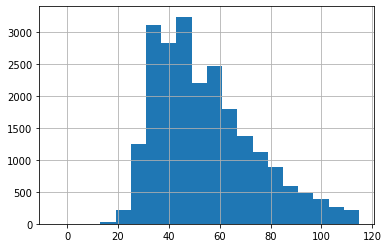

In [28]:
data['total_area'].hist(bins=20, range=(40-1.5*(69.9-40), 69.9+1.5*(69.9-40)))

Гистограмма имеет вид почти правильного распределения значений, с просадками около квартир с площадью в 40 кв. метров и 55 кв. метров. Возможно это говорит о том, что объявлений с такой площадью меньше. Пик гистограммы приходится на 45-50 кв. метров.

In [29]:
data['last_price'] = data['last_price'] / 1000000 # Сокращение цен до млн. рублей
data['last_price'].describe()

count    23699.000000
mean         6.541549
std         10.887013
min          0.012190
25%          3.400000
50%          4.650000
75%          6.800000
max        763.000000
Name: last_price, dtype: float64

* Средняя цена продаж - 6.54 млн. рублей;
* Среднее отклонение цен продаж - 10.88 млн. рублей;
* Медианная цена продаж - 4.65 млн. рублей;
* Аномально высокая максимальная цена квартиры равна 763 млн. рублей (хотя не исключено что это цена в аппартаментах в центре города).

<AxesSubplot:>

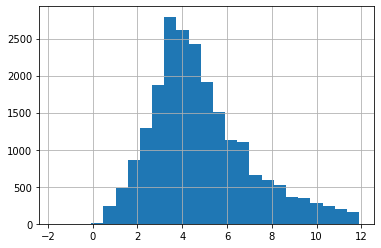

In [30]:
data['last_price'].hist(bins=25, range=(3.4-1.5*(6.8-3.4), 6.8+1.5*(6.8-3.4)))

Гистограмма имеет вид правильного распределения значений. Есть небольшие подозрения об очень заниженных ценах, хотя возможно это цены за доли в квартирах рассположенных очень далеко. Пик гистограммы приходится на 3 млн. рублей.

In [31]:
data['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

<AxesSubplot:>

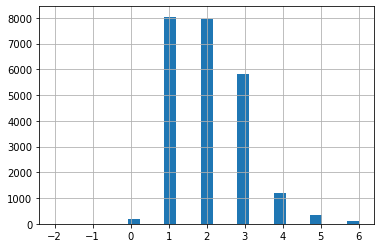

In [32]:
data['rooms'].hist(bins=25, range=(1-1.5*(3-1), 3+1.5*(3-1)))

На гистограмме отчётливо видно, что в основном продаются однокомнатные и двухкомнатные квартиры. Подозрения вызывают лишь объявления, в которых указанное число комнат равно `0`. Хотя возможно так люди указывали квартиры-студии и квартиры со свободной планировкой. 

In [33]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

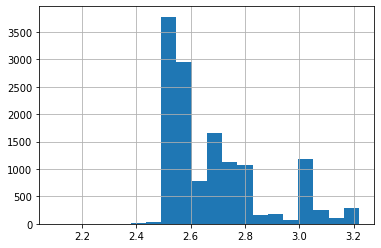

In [34]:
data['ceiling_height'].hist(bins=20, range=(2.52-1.5*(2.8-2.52), 2.8+1.5*(2.8-2.52)))

Диаграмма имеет совершенно хаотичный вид, т.к. большинство продавцов не указывает высоту потолков. Если бы эта графа при объявлении была обязательной, то гистограмма имела бы совершенно другой вид.

### Исследование времени продажи квартир

In [35]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

* В среднем квартиры продают 181 день;
* Медианное время продажи равно 95 дней;
* Самое маленькое время продажи равно 1 дню, что достаточно подозрительно. Но не исключено, что продавец передумал продавать квартиру.
* Самое долгое время продажи равно 1580 дням (почти 5 лет).
* Квартиры, продающиеся за менее чем 45 дней - это квартиры, продающиеся необычайно быстро;
* Квартиры, продающиеся за более чем 232 дня - это квартиры, продающиеся необычайно долго.

<AxesSubplot:>

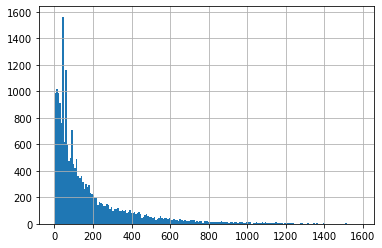

In [36]:
data['days_exposition'].hist(bins=200)

Пик истограммы расположен в самом начале графика. 

Гисторамма имеет вид распределения Пуассона, очень много квартир, продающихся за первые полгода размещения объявления. Чем больше проходит время с момента публикации, тем менее охотно покупают квартиру.

### Изучение влияния факторов на стоимость квартиры.

In [37]:
data["last_price"].corr(data["total_area"])

0.6536750579657243

Коэф. корреляции Пирсона равен 0.65, что говорит, что цена квартиры зависит от площади. Чем больше площадь, тем выше цена.

In [38]:
data["last_price"].corr(data["rooms"])

0.3633428499648948

Коэф. корреляции Пирсона равен 0,36, что говорит, что цена квартиры немного зависит от количества комнат. Чем больше комнат, тем выше цена.

In [39]:
data["last_price"].corr(data["city_centers_nearest"]) 

-0.20674734874298373

Коэф. корреляции Пирсона равен -0.21, что говорит о небольшой зависимости цены квартиры от расстояния от центра города. Отрицательный знак коэффициента говорит об обратной зависимости, то есть чем меньше расстояние до центра, тем выше цена.

In [40]:
data["last_price"].corr(data["id_group_floor"]) 

0.05891653263797449

In [41]:
data["last_price"].corr(data["id_dayweek"])   

0.0015501452176215481

In [42]:
data["last_price"].corr(data["id_month"])   

0.002779128750739722

In [43]:
data["last_price"].corr(data["year"])   

-0.043089036199508685

<AxesSubplot:xlabel='group_floor'>

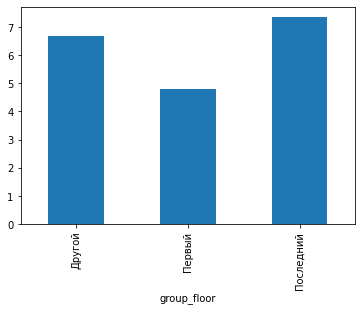

In [44]:
data.groupby('group_floor')['last_price'].mean().plot(kind='bar')

На графике видно, что средняя цена квартир на первом этаже гораздо ниже, чем на других или же на последнем

<AxesSubplot:xlabel='id_dayweek'>

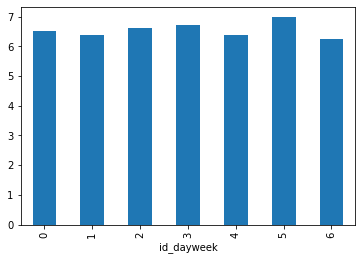

In [45]:
data.groupby('id_dayweek')['last_price'].mean().plot(kind='bar')

График показывает, что средняя цена квартир, выставляемых на продажу в субботу немного выше, чем в остальные дни, но в целом цена не зависит от дня размещения объявления.

<AxesSubplot:xlabel='id_month'>

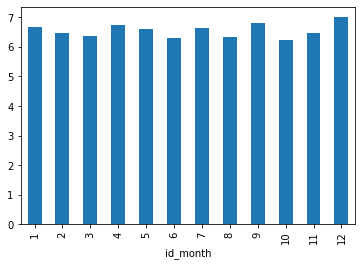

In [46]:
data.groupby('id_month')['last_price'].mean().plot(kind='bar')

Средняя цена продаваемых квартир в декабре немного выше, чем в остальные месяцы, но в целом цена не зависит от месяца размещения, так же как и от дня недели.

<AxesSubplot:xlabel='year'>

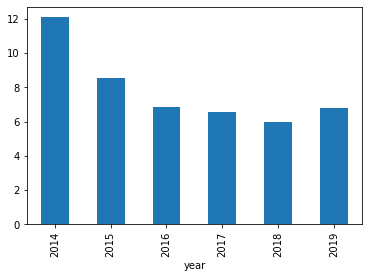

In [47]:
data.groupby('year')['last_price'].mean().plot(kind='bar')

График показывает, что в 2014 году средняя цена квартир была гораздо выше, чем в последующие года.

### Изучение 10 населённых пунктов с наибольшим числом объявлений.

In [48]:
data['locality_name'].value_counts().head(10)

Санкт-Петербург      15721
Мурино                 590
Кудрово                472
поселок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
поселок Парголово      327
Гатчина                307
Выборг                 237
Name: locality_name, dtype: int64

In [49]:
pop_10_city = ['Санкт-Петербург', 'Мурино', 
               'Кудрово', 'поселок Шушары', 
               'Всеволожск', 'Пушкин', 
               'Колпино', 'поселок Парголово', 
               'Гатчина', 'Выборг']

data.query('locality_name in @pop_10_city').pivot_table(index='locality_name', 
                         values='price_for_sq_metr')

,price_for_sq_metr
locality_name,
Всеволожск,68654.473970
Выборг,58141.909325
Гатчина,68746.146515
Колпино,75424.579112
Кудрово,95324.930508
Мурино,86087.512017
Пушкин,103125.819377
Санкт-Петербург,114849.008793
поселок Парголово,90175.913089


Ожидаемо, что в Санкт-Петербурге самая высокая средняя цена за кв. метр - 114 тыс. рублей. Самая маленькая цена за кв. метр (из 10 населённых пунктов с самым большим числом объявлений) в Выборге - 58 тыс. рублей.

### Выделение центра города в Санкт-Петербурге.

In [50]:
spb_flats = data.query('locality_name == "Санкт-Петербург"')

Расстояние до центра в таблице считается в метрах. Необходимо перевести их в км.

/tmp/ipykernel_101/1771193118.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spb_flats['city_centers_nearest_km'] = round(spb_flats['city_centers_nearest']/1000)


<AxesSubplot:xlabel='city_centers_nearest_km'>

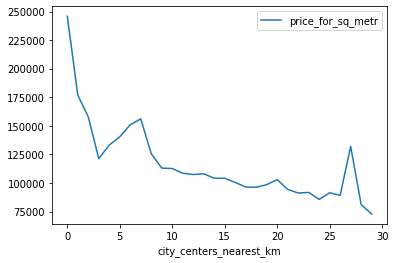

In [51]:
spb_flats['city_centers_nearest_km'] = round(spb_flats['city_centers_nearest']/1000)
grouped_spb_flats = spb_flats.pivot_table(index='city_centers_nearest_km', values='price_for_sq_metr')
grouped_spb_flats.plot()

График цены за кв. метр проседает на 3 км, затем идёт небольшой подъём и спуск на 7 км. Вероятнее всего целесообразнее считать что центр города находится в радиусе 7 км.

### Сравнение квартир в центре Санкт-Петербурга со всем городом.

In [52]:
spb_flats_center = spb_flats.query('city_centers_nearest_km <= 7')

In [53]:
spb_flats_center['total_area'].describe()

count    3525.000000
mean       93.168641
std        59.473561
min        12.000000
25%        57.000000
50%        78.700000
75%       110.000000
max       631.200000
Name: total_area, dtype: float64

<AxesSubplot:>

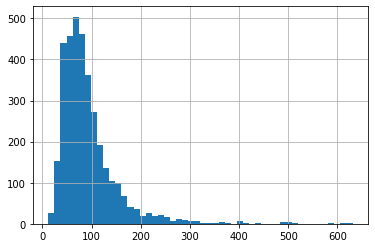

In [57]:
spb_flats_center['total_area'].hist(bins=50)

Пик гистограммы указывает на то, что в центре города площадь у большинства квартир равна около 60 кв. метров, что немного выше, чем во всём городе, так как площадь большинства квартир в Петербурге около 45-50 кв.км.

In [58]:
spb_flats_center['last_price'].describe()

count    3525.000000
mean       14.895529
std        24.320912
min         1.600000
25%         6.690000
50%         9.200000
75%        14.500000
max       763.000000
Name: last_price, dtype: float64

<AxesSubplot:>

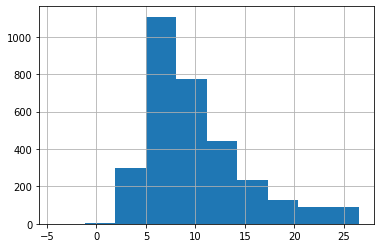

In [59]:
spb_flats_center['last_price'].hist(range=(7.3-1.5*(14.995-7.3), 14.995+1.5*(14.995-7.3)))

Пик гистограммы указывает на то, что в центре квартиры продаются в основном за 5-7,5 млн. рублей, что почти в два раза больше, чем цена большинства продаваемых квартир в городе.

In [60]:
spb_flats_center['rooms'].describe()

count    3525.000000
mean        2.834326
std         1.449808
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max        19.000000
Name: rooms, dtype: float64

<AxesSubplot:>

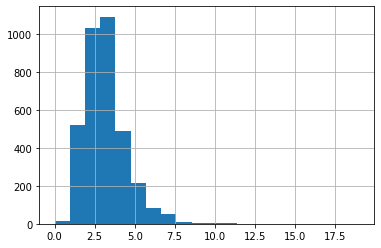

In [64]:
spb_flats_center['rooms'].hist(bins=20)

Большинство продаваемых квартир в центре имеют от 2 до 3 комнат, когда как большинство продаваемых квартир имеют 1-2.

In [65]:
spb_flats_center['ceiling_height'].describe()

count    2286.000000
mean        3.118609
std         0.871873
min         2.400000
25%         2.830000
50%         3.000000
75%         3.300000
max        32.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

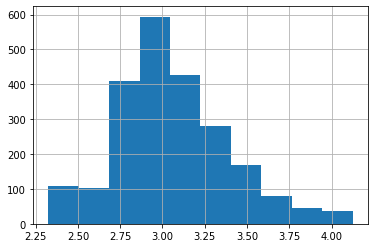

In [66]:
spb_flats_center['ceiling_height'].hist(range=(3-1.5*(3.45-3), 3.45+1.5*(3.45-3)))

У большинства квартир в центре высота потолков 2,8-3 метра. Если сравнивать с высотой потолков во всём городе, то это гораздо выше, чем во всём городе. Это обуславливается дореволюционной застройкой в центре, где высота потолков была гораздо выше, чем в последующие года.

## Общий вывод

В ходе данной работы было проделано многое:
* Заполнены пропуски в столбцах, где это было возможно;
* Устранены дубликаты в названиях населённых пунктов;
* Составлены графики и зависимости цен от факторов.

Я выяснил, что система, собирающая данные работает не до конца корректно:
* В данных есть объявления, не содержащие в себе ни одной фотографии;
* Есть объявления, в которых указано, что в них 0 комнат, а также 6 и более;
* Есть пропуски в высотах потоков, общей этажности зданий, жилых и кухонных площадях;
* Многие дубликаты появляются в названиях населённых пунктах (например "Мурино" и "поселок Мурино", "поселок Шушары" и "посёлок Шушары")
* Плохо собираются данные о близости к центру города, а также о ближайших аэропортах, парках и прудах.

При создании антимошеннических систем я бы обратил внимание на следующие параметры: наличие фотографий, значения комнат, удалённости от центра и на каком этаже располагается квартира. Также, если опираться на нормальное распределение, мне кажется что квартиры стоимостью менее 500 тыс. рублей и более 11.9 млн. рублей выглядят подозрительно.